In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Age: The age of the patient (numeric).

Anaemia: Indicates the presence of anemia (binary: 0 for no, 1 for yes).

Creatinine Phosphokinase (CPK): Level of creatinine phosphokinase enzyme in the blood (numeric).

Diabetes: Indicates whether the patient has diabetes (binary: 0 for no, 1 for yes).

Ejection Fraction: Percentage of blood leaving the heart at each contraction (numeric).

High Blood Pressure: Indicates whether the patient has high blood pressure (binary: 0 for no, 1 for yes).

Platelets: Platelet count in the blood (numeric).

Serum Creatinine: Level of creatinine in the blood (numeric).

Serum Sodium: Level of sodium in the blood (numeric).

Sex: Gender of the patient (binary: 0 for female, 1 for male).

Smoking: Indicates whether the patient smokes (binary: 0 for no, 1 for yes).

Time: Follow-up period (in days) for the patient's condition (numeric).

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Q1 What is the distribution of age among heart failure patients in the dataset

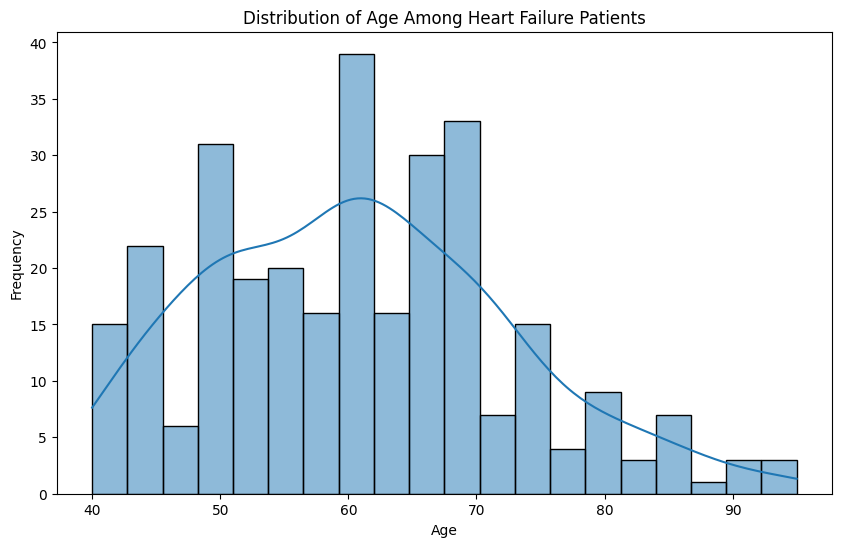

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=20)
plt.title("Distribution of Age Among Heart Failure Patients")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Q2 How does the death rate vary with age

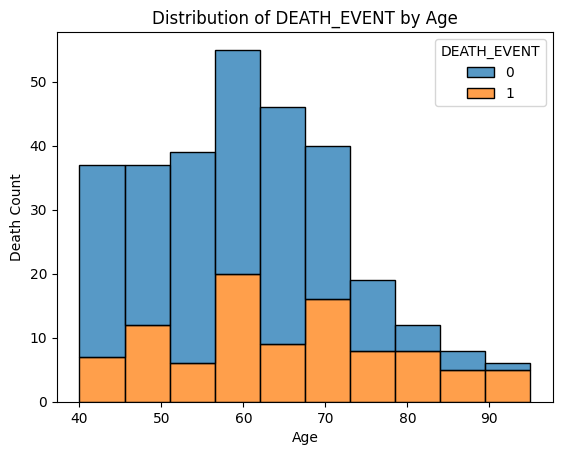

In [10]:
sns.histplot(data=df.sort_index(), x=df.age.sort_values(), hue='DEATH_EVENT', multiple='stack')
plt.title('Distribution of DEATH_EVENT by Age')
plt.xlabel('Age')
plt.ylabel('Death Count')
plt.show()

### Q3 What is the percentage of male and female patients in the dataset?

In [12]:
genders = df['sex'].value_counts()

total = genders.sum()
male_pat = (genders[1]/total)*100
female_pat = (genders[0]/total)*100

print(f"Percentage of male patients: {male_pat:.2f}%")
print(f"Percentage of female patients: {female_pat:.2f}%")

Percentage of male patients: 64.88%
Percentage of female patients: 35.12%


In [13]:
df['sex'].value_counts()

1    194
0    105
Name: sex, dtype: int64

### Q4 How does the platelet count vary among different age groups?

In [16]:
x = df.groupby('age')['platelets'].mean()

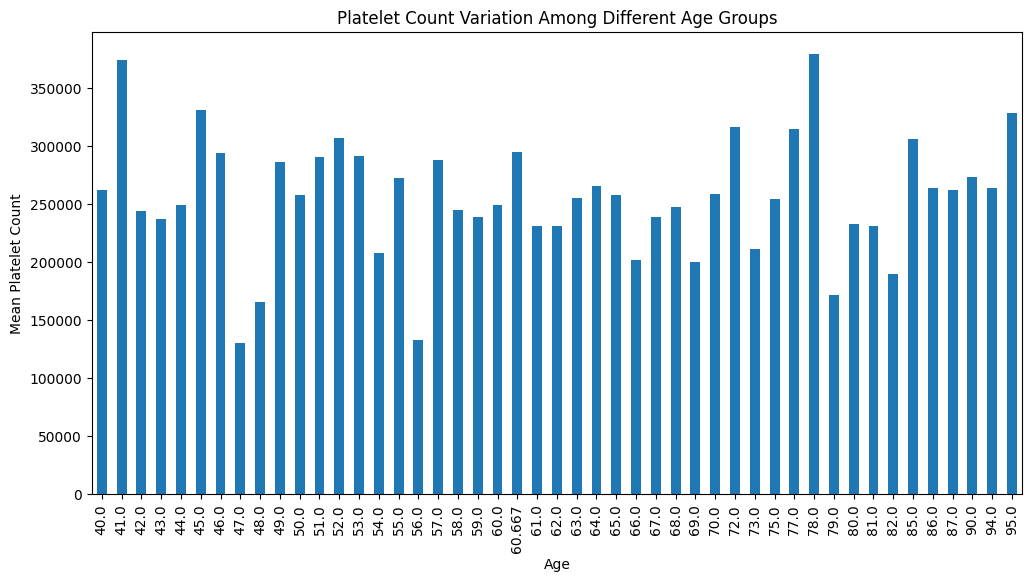

In [17]:
plt.figure(figsize=(12, 6))
x.plot(kind='bar')
plt.title('Platelet Count Variation Among Different Age Groups')
plt.xlabel('Age')
plt.ylabel('Mean Platelet Count')
plt.show()

### Q5 Is there a correlation between creatinine and sodium levels in the blood?

In [19]:
from scipy.stats import pearsonr

In [20]:
corr, _ = pearsonr(df['creatinine_phosphokinase'], df['serum_sodium'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.060


### Q6 How does the prevalence of high blood pressure differ between male and female patients<

In [28]:
high_bp_by_gender = df.groupby('sex')['high_blood_pressure'].mean() * 100
high_bp_by_gender.index = ['Female', 'Male']

In [29]:
print(high_bp_by_gender)

Female    41.904762
Male      31.443299
Name: high_blood_pressure, dtype: float64


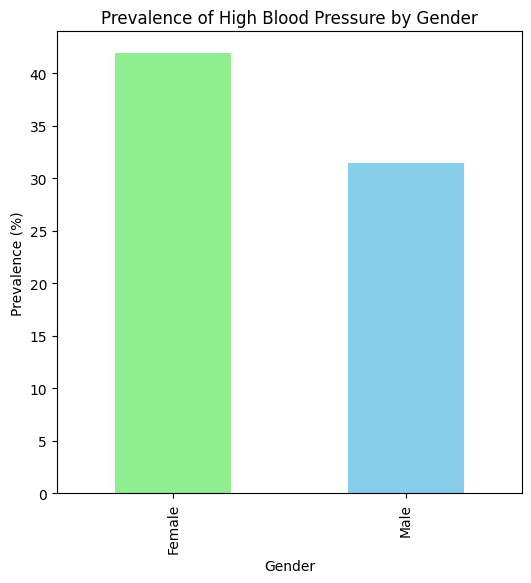

In [30]:
plt.figure(figsize=(6, 6))
high_bp_by_gender.plot(kind='bar', color=['lightgreen', 'skyblue'])
plt.title('Prevalence of High Blood Pressure by Gender')
plt.xlabel('Gender')
plt.ylabel('Prevalence (%)')
plt.show()

### Q7 What is the relationship between smoking habits and the occurrence of heart failure?

In [37]:
death_rate_by_smoking = df.groupby('smoking')['DEATH_EVENT'].mean() * 100
death_rate_by_smoking.index = ['Non-Smoker', 'Smoker']

In [38]:
print(death_rate_by_smoking)

Non-Smoker    32.512315
Smoker        31.250000
Name: DEATH_EVENT, dtype: float64


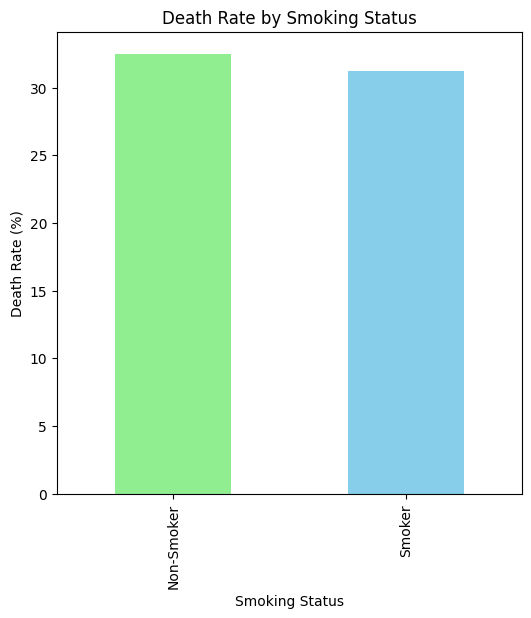

In [39]:
plt.figure(figsize=(6, 6))
death_rate_by_smoking.plot(kind='bar', color=['lightgreen', 'skyblue'])
plt.title('Death Rate by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Death Rate (%)')
plt.show()

### Q8 Are there any noticeable patterns in the distribution of death events across different age groups?

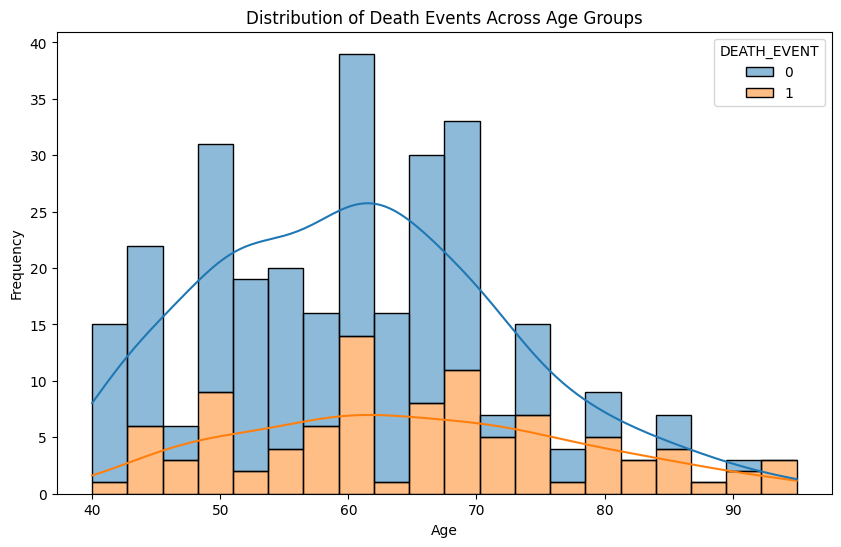

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='DEATH_EVENT', multiple='stack', bins=20, kde=True)
plt.title('Distribution of Death Events Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Q9 Is there any significant difference in ejection fraction between patients with and without diabetes<

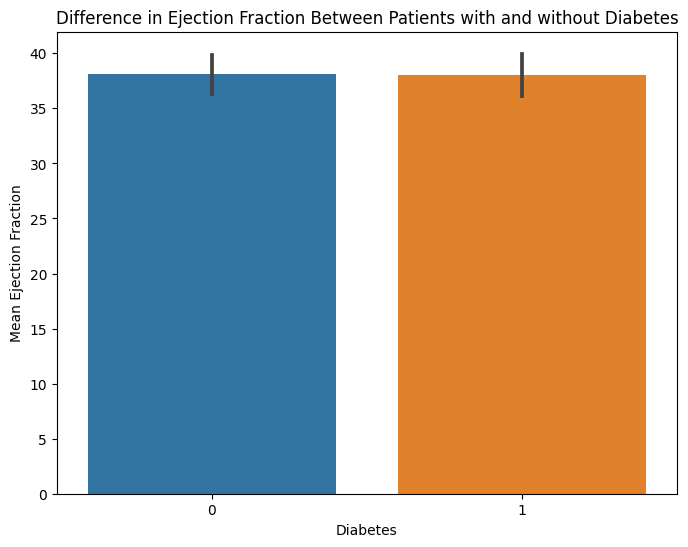

In [46]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='diabetes', y='ejection_fraction')
plt.title('Difference in Ejection Fraction Between Patients with and without Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Mean Ejection Fraction')
plt.show()

### Q10 How does the serum creatinine level vary between patients who survived and those who did not?

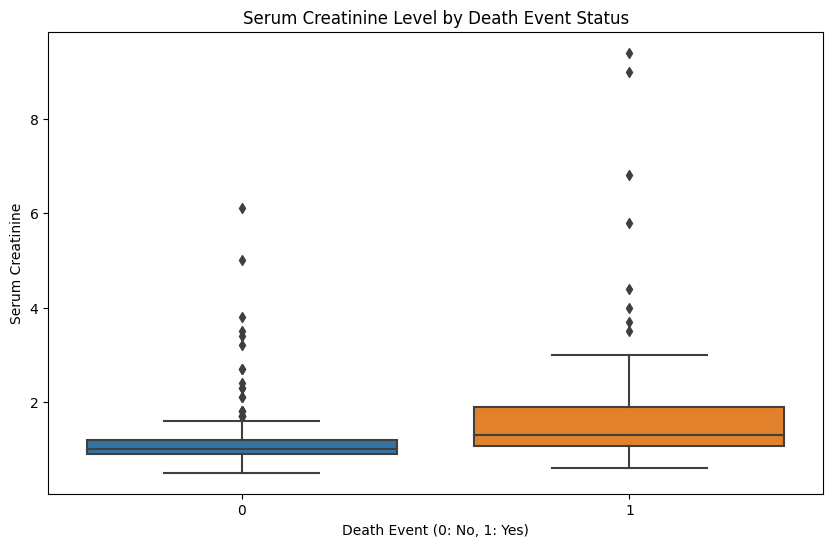

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df)
plt.title('Serum Creatinine Level by Death Event Status')
plt.xlabel('Death Event (0: No, 1: Yes)')
plt.ylabel('Serum Creatinine')
plt.show()

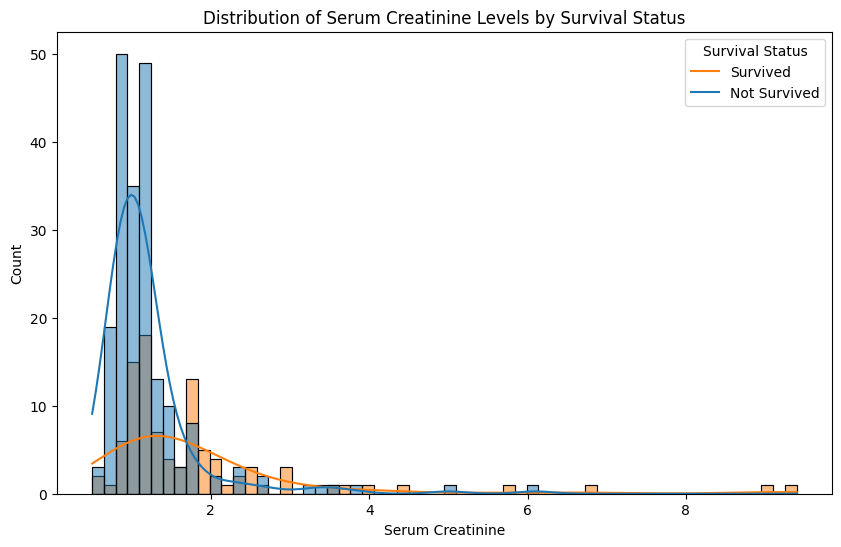

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='serum_creatinine', hue='DEATH_EVENT', kde=True)
plt.title('Distribution of Serum Creatinine Levels by Survival Status')
plt.xlabel('Serum Creatinine')
plt.ylabel('Count')
plt.legend(title='Survival Status', labels=['Survived', 'Not Survived'])
plt.show()